<a href="https://colab.research.google.com/github/shaniafang/CEE-4350/blob/master/Python_Tutorial_Shania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Tutorial for CEE 4530

The goal of this tutorial is to help you learn some of the essential tools for data analysis and presentation that you will need throughout the semester.

You will need to save this file in your google drive.

Select the flask in the upper right corner and opt in to the new editor for Colab. This will make it a whole lot easier to write python code!

For a more detailed tutorial see the [python tutorial](https://aguaclara.github.io/Textbook/Introduction/Python_Tutorial.html) used for CEE 4520.

## Objectives

1. illustrate how to load data from a file
1. learn about dataframes
1. perform a linear regression
1. create a well formatted graph
1. create an equation
1. add the graph to your document as a figure.

See [Selecting Subsets of Data in Pandas](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c) for a good background on working with a pandas dafaframe.

In [0]:
!pip install aguaclara
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 13.0MB 8.9MB/s 
     |████████████████████████████████| 163kB 46.7MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.1.16-cp36-none-any.whl size=99641 sha256=8023b26dcbcc1d8c09a4603710e7fbaa46a8c303ea2086a1f6720f2251cf7a35
  Stored in directory: /root/.cache/pip/wheels/4b/05/cb/7fed32189f54fb4ca68d5114698799f11457613b8217ad0ec9
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134155 sha256=7870b445bc8647b746371da621acadb2c0e032dbe4ac210df76b3700601454e0
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0

    standard (mg/L)  measured (mg/L)
0                 0           -0.176
1                 1             2.44
2                 2            3.571
3                 3            5.596
4                 4            8.363
5                 5            10.18
6                 6            11.79
7                 7            13.64
8                 8            16.13
9                 9            17.67
10               10            19.96
Index(['standard (mg/L)', 'measured (mg/L)'], dtype='object')


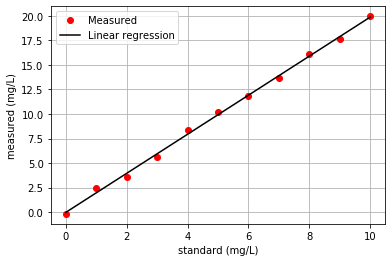

In [0]:
#The data file path is the raw data url on github. Happily python can read directly from a web page.
data_file_path = "https://raw.githubusercontent.com/monroews/CEE4530/master/linear_regression.tsv"

#Now we create a pandas dataframe with the data in the file
df = pd.read_csv(data_file_path,delimiter='\t')
#if you want to see what is in the dataframe you can print it!
print(df)
# The column headers can be accessed by using the list command
list(df)
columns = df.columns
print(columns)
#Below are three equally fine methods of extracting a column of data from the pandas dataframe.

# 1) We can select a column by using the column header. Here we use the column header by selecting one array element from the list command.
x = df[list(df)[0]].values * u.mg/u.L
x
# 2) We can use the loc command to select all of the rows (: command) and the column with the label given by list(df)[0].
x = df.loc[:, list(df)[0]].values * u.mg/u.L
x
# 3) We can use the iloc command and select all of the rows in column 0.
x = df.iloc[:,0].values * u.mg/u.L
x
#The iloc method is simple and efficient, so I'll use that to get the y values.
y = df.iloc[:,1].values * u.mg/u.L

# We will use the stats package to do the linear regression.
# It is important to note that the units are stripped from the x and y arrays when processed by the stats package.
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#We can add the units to intercept by giving it the same units as the y values.
intercept = intercept * y.units
# Note that slope is dimensionless for this case, but not in general!
# For the general case we can attach the correct units to slope.
slope = slope * y.units/x.units

# Now create a figure and plot the data and the line from the linear regression.
fig, ax = plt.subplots()
# plot the data as red circles
ax.plot(x, y, 'ro', )

#plot the linear regression as a black line
ax.plot(x, slope * x + intercept, 'k-', )

# Add axis labels using the column labels from the dataframe
ax.set(xlabel=list(df)[0])
ax.set(ylabel=list(df)[1])
ax.legend(['Measured', 'Linear regression'])
ax.grid(True)
plt.show()

In [0]:
velocity= 5*u.mile/u.hr
print(velocity.to(u.m/u.s))
# free fall for 5 seconds
t=5*u.sec
#WRONG velocity_freefall= u.gravity*t**2
velocity_freefall= u.gravity*t
print('After free fall for',t,'the velocity will be',velocity_freefall.to(u.m/u.s))

2.235 meter / second
After free fall for 5 second the velocity will be 49.03 meter / second


Now we will display our figure in Colab. To have the figure show up for anyone who opens this Colab file we copy the image above and paste it into a text box and add a caption. To have the caption appear on a new line we insert an extra return below the figure.



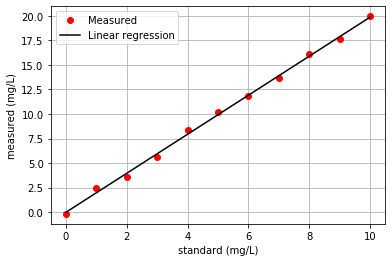

Figure 1: Captions are very important for figures. Captions go below figures on a new line. Place figures in their own text boxes to make it easier to edit the text without seeing the long code used to store the image.


Equations can be copied directly from the lab manual by clicking on the equation and requesting that it be displayed in Latex. Below is equation 2 from the [Laboratory Manual](https://monroews.github.io/EnvEngLabTextbook/Laboratory_Measurements/Laboratory_Measurements.html)

$$A=\log \left(\frac{P_{o} }{P} \right)$$


You can also build your own beautiful Latex equations using [codecogs](https://www.codecogs.com/latex/eqneditor.php).

# Assignment

1.   Find a set of data that includes units (or make one up!) that could reasonably be fit with linear regression.
1.   Save the data to a tab delimited file in your atom project workspace.
1.   Load the data from the file into a Pandas dataframe.
1.   Plot the data and the linear regression line.
1.   Make sure to handle units carefully and to attach units to the linear regression line.
1.   Add a figure in Markdown showing the graph you produced.
1.   Show the linear regression equation that you obtained using latex.

   Time(s)  Distance(m)
0        1           10
1        2           18
2        3           29
3        4           41
4        5           50
5        6           62
6        7           71
7        8           79
8        9           91
9       10          103
Index(['Time(s)', 'Distance(m)'], dtype='object')


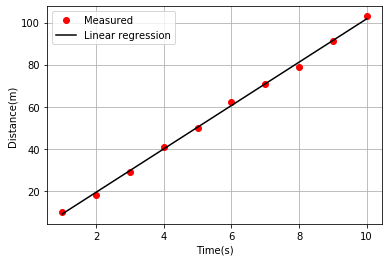

In [0]:
data_file= "https://raw.githubusercontent.com/shaniafang/CEE-4350/master/CEE%204530%20Python%20Tutorial%20-%20Sheet1.tsv"

#Now we create a pandas dataframe with the data in the file
df1 = pd.read_csv(data_file,delimiter='\t')
#if you want to see what is in the dataframe you can print it!
print(df1)
# The column headers can be accessed by using the list command
list(df1)
columns = df1.columns
print(columns)
#Below are three equally fine methods of extracting a column of data from the pandas dataframe.

# 1) We can select a column by using the column header. Here we use the column header by selecting one array element from the list command.
x = df1[list(df1)[0]].values * u.mg/u.L
x
# 2) We can use the loc command to select all of the rows (: command) and the column with the label given by list(df)[0].
x = df1.loc[:, list(df1)[0]].values * u.mg/u.L
x
# 3) We can use the iloc command and select all of the rows in column 0.
x = df1.iloc[:,0].values * u.mg/u.L
x
#The iloc method is simple and efficient, so I'll use that to get the y values.
y = df1.iloc[:,1].values * u.mg/u.L

# We will use the stats package to do the linear regression.
# It is important to note that the units are stripped from the x and y arrays when processed by the stats package.
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#We can add the units to intercept by giving it the same units as the y values.
intercept = intercept * y.units
# Note that slope is dimensionless for this case, but not in general!
# For the general case we can attach the correct units to slope.
slope = slope * y.units/x.units

# Now create a figure and plot the data and the line from the linear regression.
fig, ax = plt.subplots()
# plot the data as red circles
ax.plot(x, y, 'ro', )

#plot the linear regression as a black line
ax.plot(x, slope * x + intercept, 'k-', )

# Add axis labels using the column labels from the dataframe
ax.set(xlabel=list(df1)[0])
ax.set(ylabel=list(df1)[1])
ax.legend(['Measured', 'Linear regression'])
ax.grid(True)
plt.show()

![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEGCAYAAACKB4k+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nO3deVxV1frH8c+jUo4558+rKdZNAycc%0AM805h6tlVteupjkkoDlgmtPNUrMwzTEtB5xTHHLMocwJMtNSwQmHNFMUrzlliAzKsH5/nCOBYoJw%0A2MB53q/XeXH2Pvuc/WWJPKw9rCXGGJRSSimAXFYHUEoplXVoUVBKKZVIi4JSSqlEWhSUUkol0qKg%0AlFIqUR6rA6RHiRIljKurq9Ux0iUyMpICBQpYHSPL0Pb4i7ZFctoeyaWnPYKCgq4aY0qm9Fq2Lgqu%0Arq7s37/f6hjpEhgYSJMmTayOkWVoe/xF2yI5bY/k0tMeIhJ6v9f08JFSSqlEWhSUUkol0qKglFIq%0AUbY+p5CS2NhYwsLCiImJsTpKqhQuXJjjx49bHSPLSG175M2bl7Jly+Li4pIJqZRyHjmuKISFhVGo%0AUCFcXV0REavjPFBERASFChWyOkaWkZr2MMZw7do1wsLCqFChQiYlU8o55LjDRzExMRQvXjxbFAT1%0AcESE4sWLZ5veoFIZyt8fXF1p3KwZuLraljNQjuspAFoQnID+Gyun5O8P3t4QFYUAhIbalgE6d86Q%0AXeS4noJSSuVYI0ZAVFTydVFRtvUZRIuCA4gIXbp0SVyOi4ujZMmSvPjiixamerAmTZpk+5sBlcrR%0Azp1L2/qHoEXBfnyOXLky7PhcgQIFCAkJITo6GoCtW7dSpkyZdH/uw4iLi7Nkv0opByhXDoBIwKSw%0APiM4d1G4c3wuNBSM+ev4XAYUhjZt2rBp0yYAli1bRqdOnRJfi4yM5K233qJu3bo8//zzfP311wCc%0APXuWhg0bUrNmTWrWrMnu3bsBuHjxIo0aNcLDw4MqVarwww8/AFCwYMHEz1y1ahXdu3cHoHv37vTu%0A3Ztnn32WoUOHJttfjRo1EvcXHR1Nx44dcXNz45VXXkksYkqpLMrXl68feYSKwJo76/LnB1/fDNuF%0Aw4qCiMwXkcsiEpJkXTER2Soip+xfi9rXi4hME5FfReSwiNR0VK5kHHh8rmPHjixfvpyYmBgOHz7M%0As88+m/iar68vzZo1Y+/evWzcuJEhQ4YQGRnJ448/ztatWwkODmbFihX4+PgAsHTpUlq1asXBgwc5%0AdOgQHh4eD9x/WFgYu3fvZvLkycn2FxAQkLi/mTNnkj9/fo4fP86HH35IUFBQur9vpZRj/P7773RY%0At472t29TwsWFcgDly4OfX4adZAbH9hQWAq3vWjcc2G6MeRrYbl8G+BfwtP3hDcx0YK6/OPD4XLVq%0A1Th79izLli2jTZs2yV7bsmUL48aNw8PDg7Zt2xITE8O5c+eIjY3Fy8uLqlWr0qFDB44dOwZAnTp1%0AWLBgAaNHj+bIkSOpuq+hQ4cO5M6d+579NWnSJHF/O3fuTDz3Ua1aNapVq5bu71splbGMMcybNw83%0ANzc2bNjA2LFj2R8ZSWRAAJw9m6EFARx4SaoxZqeIuN61+mWgif35IiAQGGZf/6UxxgA/iUgRESlt%0AjLnoqHyA7ThcaAqDBWbQ8bl27doxePBgAgMDuXbtWuJ6YwyrV6+mUqVKyW7WGj16NKVKleLQoUMk%0AJCSQN29eABo1asTOnTvZtGkT3bt3Z9CgQXTt2jXZZZl3X7OfdEjdpPtTSmUfv/76K97e3gQEBNC4%0AcWP8/PyoWLGiQ/eZ2ecUSiX5Rf87UMr+vAxwPsl2YfZ1juXrazsel1QGHp976623GDVqFFWrVk22%0AvlWrVkyfPh1bDYQDBw4AEB4eTunSpcmVKxeLFy8mPj4egNDQUEqVKoWXlxeenp4EBwcDUKpUKY4f%0AP05CQgJr1669b4777a9Ro0YsXboUgJCQEA4fPpwh37dSKn3i4uIYP348VatWJTg4GD8/P3bs2OHw%0AggAW3rxmjDEiYh68ZXIi4o3tEBOlSpUiMDAw2euFCxcmIiIidR/Wrh15YmJ49MMPkbAwTNmy3Bo1%0Airh27SC1n3EfERERFC5cmB49ehAREUFUVBRxcXFERETwzjvvMHz4cKpUqUJCQgLly5dn5cqVdO3a%0AlTfffJOFCxfywgsvUKBAASIiIvj222+ZNm0aLi4uFChQgNmzZxMREcGoUaNo06YNJUqUoEaNGkRG%0ARhIREUFsbCzR0dGJ7XC//XXp0oW3336bSpUqUalSJTw8PBI/wyrx8fGp3n9MTMw9//45yc2bN3P0%0A95dWztIeJ0+eZOLEiZw6dYqGDRvi4+NDiRIl2LlzZ7LtHNYexhiHPQBXICTJ8i9Aafvz0sAv9uez%0AgU4pbfd3j1q1apm7HTt27J51WdmNGzesjpClpKU9stu/dVoFBARYHSFLyentERkZaQYPHmxy5cpl%0ASpcubVavXv2326enPYD95j6/VzP78NF6oJv9eTfg6yTru9qvQqoHhBtHn09QSqksYvv27VStWpWJ%0AEyfSs2dPjh07xquvvmpJFkdekroM2ANUEpEwEekJjANaiMgp4AX7MsA3wG/Ar8AcoI+jcimlVFbx%0Axx9/8NZbb/HCCy+QO3duAgIC8PPzo0iRIpZlcuTVR53u81LzFLY1QF9HZVFKqazEGMPKlSvp378/%0A165d47///S8ffPAB+fLlszpazhwlVSmlsqqwsDD69OnDhg0bqFWrFlu2bKF69epWx0rk3MNcKKVU%0AJklISGDGjBm4u7uzbds2Jk2axE8//ZSlCgJoT0EppRzu+PHjeHl58eOPP9KiRQtmzZrFk08+aXWs%0AFGlPwQGSDlR3x6xZs/jyyy8tSJO1rF+/nnHjxj14Q6VygNu3bzNmzBg8PDw4duwYCxcu5Lvvvsuy%0ABQG0p5Bpevfu7dDPT7zGOFfKdT4+Pj5xLKSHERcXR5486f9xadeuHe3atUv35yiV1e3ZswcvLy+O%0AHj1Kx44dmTp1KqVKlXrwGy2mPYVMMnr0aCZOnAjYJrMZNmxY4lDWd4bCjo+PZ8iQIdSpU4dq1aox%0Ae/ZswHbnYvPmzalZsyZVq1ZNNtR2pUqV6Nq1K1WqVOH8+fPJ9unq6sqwYcOoWbMmK1eu5PTp07Ru%0A3ZpatWrRsGFDTpw4AcDp06epV68eVatW5f3330/s6QQGBtKwYUPatWuHu7s7AEuWLKFu3bp4eHjQ%0Aq1cv4uPjiY+Pp3v37lSpUoWqVasyZcoUAKZNm4a7uzvVqlWjY8eOACxcuJB+/fol5m/WrBnVqlWj%0AefPmnLMPRNi9e3d8fHyoX78+Tz75JKtWrXLMP4pSDhAREYGPjw8NGjQgPDycDRs2sGzZsmxRECCH%0A9xTeeecdDh48mKGf6eHhwdSpU9P9OXFxcezdu5dVq1bx4Ycfsm3bNubNm0fhwoXZt28ft27dokGD%0ABrRs2ZInnniCtWvX8thjj3H16lXq1auX+Nf2qVOnWLRoEfXq1UtxP8WLF08cK6l58+bMmjWLp59+%0Amp9//pk+ffqwY8cOBgwYwIABA+jUqROzZs1K9v7g4GBCQkKoUKECx48fZ8WKFfz444+4uLjQp08f%0A/P39qVy5MhcuXCAkxDZK+p9//gnAuHHjOHPmDI8++mjiuqT69+9Pt27d6NatG/Pnz8fHx4fFixcD%0Atjkkdu3axYkTJ2jXrh3//ve/093mSjnaN998w9tvv8358+fp27cvY8eOTdWoxllJji4KWdmduxVr%0A1KjB2bNnAdsQ14cPH078yzg8PJxTp05RtmxZ3nvvPXbu3EmuXLm4cOECly5dAqB8+fL3LQgA//nP%0AfwBbb2P37t106NAh8bVbt24Btm7uunXrAHjjjTcYPHhw4jZ169alQoUKgO2uy6CgIOrUqQPYJul5%0A/PHHeemll/jtt9/o378/bdu2pWXLloBtOO7OnTvTvn172rdvf0+2PXv2sGaNbaqQN998k6FDhya+%0A1r59e3LlyoW7u3vi96pUVnXlyhUGDBjAsmXLcHNzY9euXdSvX9/qWA8lRxeFjPiL3lEeffRRAHLn%0Azp04ZaYxhunTp9OqVatk2y5cuJArV64QFBSEi4sLrq6uiUNlJx0iOyV3Xk9ISKBIkSJp7jndPQR3%0At27d+OSTT+7Z7tChQ3z33XfMmjWLr776ivnz57Np0yZ27tzJhg0b8PX15ciRI6ne7532ubNfpbIi%0AYwxLlixh4MCB3Lhxg9GjRzN8+PBkP7/ZjZ5TyEJatWrFzJkziY2NBWyjJUZGRhIeHs7jjz+Oi4sL%0AAQEBhKY0B8QDPPbYY1SoUIGVK1cCth/mQ4cOAVCvXj1Wr14NwPLly+/7Gc2bN2fVqlVcvnwZsN2i%0AHxoaytWrV0lISOC1117j448/Jjg4mISEBM6fP0/Tpk0ZP3484eHh3Lx5M9nn1a9fP3F//v7+NGzY%0AMM3fl1JWOXPmDK1bt6Zr165UrFiRAwcOMGrUqGxdECCH9xSsEhUVRdmyZROXBw0alKr3eXp6cvbs%0AWWrWrIkxhpIlS7Ju3To6d+7MSy+9RNWqValduzbPPPPMQ+Xy9/fn7bff5uOPPyY2NpaOHTtSvXp1%0Apk6dSpcuXfD19aV169YULlw4xfe7u7vz8ccf07JlSxISEnBxceGLL74gX7589OjRg4SEBAA++eQT%0A4uPj6dKlC+Hh4Rhj8PHxuWc8l+nTp9OjRw8mTJhAyZIlWbBgwUN9X0plCn9/GDGC+NBQphUtyvtR%0AUeRyceHzzz/n7bffvu+Vf9nO/YZPzQ4PHTo7Y0RGRpqEhARjjDHLli0z7dq1syyLDp39l5w+VHRa%0AWdoeS5YYkz+/OQSmDhjAtMmVy4ROnWpZJEcNna09BUVQUBD9+vXDGEORIkWYP3++1ZGUylJi3nuP%0Aj6Ki+BQoCiwD/pOQgEyZAgMGWJwuY2lRUDRs2DDx/IJSKrnvv/8e73PnOIltEphJQPE7L9rvrclJ%0AcshBsOSMXq2S4+m/sXK08PBwevXqRZMmTYjNk4ctwEKSFASAcuUsyeZIOa4o5M2bl2vXrukvjRzM%0AGMO1a9fImzev1VFUDrVu3Trc3NyYO3cu7777LkdmzaJF/vzJN8qfH3x9rQnoQDnu8FHZsmUJCwvj%0AypUrVkdJlZiYGP3llkRq2yNv3rzJrvBSKiNcvHiR/v37s3r1aqpVq8b69eupXbu27cW8eWHECNsh%0Ao3LlbAWhc2drAztAjisKLi4uiXfgZgeBgYHUqFHD6hhZhraHsoIxhnnz5jF48GBiYmIYO3YsgwcP%0AxsXF5a+NOnfOkUXgbjmuKCilVFqcOnUKb29vAgMDady4MX5+flSsWNHqWJbJcecUlFIqNWJjYxk3%0AbhzVqlXjwIED+Pn5sWPHDqcuCKA9BaWUEwoKCsLT05ODBw/y6quvMn36dP7xj39YHStL0J6CUspp%0AREVFMWTIEOrWrculS5dYvXo1q1ev1oKQhPYUlFJOYdu2bXh7e3PmzBm8vb0ZP378PeNxKe0pKKVy%0AuD/++IMePXrQokUL8uTJQ2BgILNnz9aCcB9aFJRSOZIxhhUrVuDm5saSJUt47733OHz4MI0bN7Y6%0AWpamh4+UUjnO+fPn6dOnDxs3bqR27dps2bKF6tWrWx0rW9CeglIqx0hISOCLL77A3d2dHTt2MHny%0AZH766SctCGmgPQWlVI5w7NgxvLy82L17Ny1btmTWrFnZanSDrEJ7CkqpbO327duMGTOGGjVqcOLE%0ACb788ks2b96sBeEhaU9BKZVt7dmzBy8vL44ePUqnTp2YOnUqjz/+uNWxsjXtKSilsp2IiAh8fHxo%0A0KABN27cYOPGjSxdulQLQgbQnoJSKlv55ptv6N27N2FhYfTr1w9fX18KFSpkdawcQ4uCUipbuH79%0AOm+88QbLli3D3d2dH3/8keeee87qWDmOJUVBRAYCnoABjgA9gNLAcmyz3QUBbxpjbluRTymVdRhj%0AWLJkCf369SM6OpoPP/yQ4cOH88gjj1gdLUfK9HMKIlIG8AFqG2OqALmBjsB4YIox5p/AdaBnZmdT%0ASmUtZ86coVWrVnTt2pUnnniCgwcPMnLkSC0IDmTVieY8QD4RyQPkBy4CzYBV9tcXAe0tyqaUslh8%0AfDyTJ0+mSpUq7Nmzhy+++IJp06bh7u5udbQcL9MPHxljLojIROAcEA1swXa46E9jTJx9szCgTGZn%0AU0pZ79ChQ3h5ebFv3z5efPFFZrRowROfforJ4XMjZxWZXhREpCjwMlAB+BNYCbROw/u9AW+AUqVK%0AERgY6ICUmefmzZvZ/nvISNoef3G2trh9+zZffvkly5cv57HHHmPkyJG8HhfHP4YOhVu3EIDQUOJ7%0A9uSX48e5/MILVke2lMN+PowxmfoAOgDzkix3BWYCV4E89nXPAd896LNq1aplsruAgACrI2Qp2h5/%0Acaa2CAwMNBUrVjSA6d69u7l27ZrthfLljYF7H+XLWxk3S0jPzwew39zn96oV5xTOAfVEJL+ICNAc%0AOAYEAP+2b9MN+NqCbEqpTPTnn3/Sq1cvmjRpQmxsLFu3bmXBggUUK1bMtsG5cym/8X7rVbplelEw%0AxvyM7YRyMLbLUXMBfsAwYJCI/IrtstR5mZ1NKZV51q5di7u7O3PnzmXw4MGEhITwwt2HhMqVS/nN%0A91uv0s2S+xSMMaOAUXet/g2oa0EcpVQm+t///kf//v1Zs2YNHh4ebNiwgVq1aqW8sa8veHtDVNRf%0A6/Lnt61XDqFjHymlMoUxhjlz5uDu7s4333zDuHHj2Lt37/0LAtiuMvLzg/LlMSJQvrxtWa8+chgt%0ACkophzt58iRNmzbF29ubGjVqcPjwYYYNG4aLi8uD39y5M5w9y/c7dsDZs1oQHEyLglLKYWJjY/nk%0Ak0+oVq0aBw8eZO7cuezYsYOnn37a6mjqPnRAPKWUQ+zfvx9PT08OHTrEa6+9xvTp0yldurTVsdQD%0AaE9BKZWhIiMjGTx4MM8++yxXrlxh7dq1rFq1SgtCNqE9BaVUhtm6dSu9evXizJkz9OrVi/Hjx1O4%0AcGGrY6k00J6CUirdrl27Rvfu3WnZsiUuLi58//33zJo1SwtCNqRFQSn10IwxLF++HDc3N/z9/Rkx%0AYgSHDh2iUaNGVkdTD0kPHymlHsq5c+fo06cPmzZtok6dOmzbto1q1apZHUulk/YUlFJpkpCQwOef%0Af07lypUJCAhgypQp7NmzRwtCDqE9BaVUqh07dgxPT0/27NlDy5YtmT17Nq6urlbHUhlIewpKqZT5%0A+4OrK+TKxa3y5fnwtdfw8PDg5MmTLF68mM2bN2tByIG0p6CUupe/f+JAdHsAz3PnOHbuHG/Ur8/U%0AdesoWbKk1QmVg2hPQSl1rxEjiIiKoj/QALgJfAP4X7igBSGH06KglLrHptBQ3IEvgH5ACPAv0Mlt%0AnIAWBaVUosuXL9OpUydeBAoDu4FpQKE7G+jkNjmeFgWlFMYYFi1ahJubG2vWrGHMa68RnC8f9ZJu%0ApJPbOAUtCko5ud9++42WLVvSvXt33NzcOHjwIB+sWsUjc+bYJrXRyW2cSqqvPhKRx7Gdc/oHEI3t%0AMON+Y0yCg7IppRwoLi6Ozz77jA8++IA8efIwY8YMevXqRa5c9r8VO3fWIuCEHlgURKQpMBwoBhwA%0ALgN5gfbAUyKyCphkjLnhyKBKqYxz8OBBPD09CQoK4qWXXmLGjBmULVvW6lgqC0hNT6EN4GWMueey%0AAxHJA7wItABWZ3A2pVQGi46OZsyYMUyYMIHixYvz1Vdf8e9//xsRsTqayiIeWBSMMUP+5rU4YF2G%0AJlJKOURgYCDe3t6cOnWKt956iwkTJlCsWDGrY6ksJi3nFIoAXQHXpO8zxvhkfCylVEb5888/GTJk%0ACHPnzuXJJ59k27ZtNG/e3OpYKotKyzAX3wA/AUcAPbmsVDawZs0a+vbty+XLlxkyZAijR48mf/78%0AVsdSWVhaikJeY8wghyVRSmWY//3vf/Tr14+1a9fi4eHBpk2bqFmzptWxVDaQlvsUFouIl4iUFpFi%0Adx4OS6aUSrOEhAT8/Pxwc3Pj22+/Zfz48ezdu1cLgkq1tPQUbgMTgBGAsa8zwJMZHUoplXa//PIL%0A3t7e7Ny5k6ZNm+Ln58c///lPq2OpbCYtReFd4J/GmKuOCqOUSrvY2FgmTJjAmDFjyJcvH/PmzaNH%0Ajx56mal6KGkpCr8CUY4KopRKu3379uHp6cnhw4fp0KED06ZN4//+7/+sjqWysbScU4gEDorIbBGZ%0AdufhqGBKOS37jGeNmzWzzXzm73/PJpGRkQwaNIh69epx9epV1q1bx1dffaUFQaVbWnoK69Ab1ZRy%0ArCQznglAaKhtGRLHIdqyZQu9evXi7NmzvP3223zyyScULlzYssgqZ0l1UTDGLHJkEKUUMGIERN11%0AlDYqCkaM4Frr1gwaNIgvv/ySSpUqsXPnTho2bGhNTpVjPfDwkYhsEJGXRMQlhdeeFJExIvKWY+Ip%0A5WRSmNnMAMtCQ3Fzc2Pp0qW8//77HDx4UAuCcojU9BS8gEHAVBH5A7iCbZTUCthOPn9ujPnacRGV%0AciLlytkOGdmdA97GNpxA3QoV2L59O1WrVrUqnXICqRkQ73dgKDBURFyB0tjmUzhpjHmoq5Hs4yjN%0ABapg+0PoLeAXYAW2sZXOAq8bY64/zOcrlW35+oK3N/FRUcwA/mtfPbVLF/otXEju3LmtTKecQFpn%0AXjNAAWPMQcCISKEHveE+PgM2G2OeAaoDx7HN2bDdGPM0sN2+rJRz6dyZoyNH8vwjj+ADPJ83LyFT%0ApjBg8WItCCpTpLooiIgXsAqYbV9Vloe4GklECgONgHkAxpjbxpg/gZeBOyezF2GbxEcpp3Hr1i1G%0AjRpFjQ8+4FShQrz33nt8GxWF6zvvWB1NORExxjx4K0BEDgJ1gZ+NMTXs644YY9J0gFNEPAA/4Bi2%0AXkIQMAC4YIwpYt9GgOt3lu96vzfgDVCqVKlay5cvT8vus5ybN29SsGBBq2NkGc7aHiEhIUycOJHQ%0A0FBatGhBnz59yJMnj1O2xf0468/G/aSnPZo2bRpkjKmd4ovGmFQ9sBUDgAP2r3mAw6l9f5LPqQ3E%0AAc/alz8DPgL+vGu76w/6rFq1apnsLiAgwOoIWYqztUd4eLjp27evERFTrlw58+233ya+5mxt8SDa%0AHsmlpz2A/eY+v1fTck7hexF5D8gnIi2AlcCGNJcoCAPCjDE/25dXATWBSyJSGsD+9fJDfLZS2cbG%0AjRupXLkyM2bMwMfHh6NHj9K6dWurYyknl5aiMBzb5ahHgF7YrpJ7P607NLarmc6LSCX7qubYDiWt%0AB7rZ13UD9DJXlSNdunSJjh078tJLL1GkSBH27NnD1KlT9dCIyhLSMsxFPmC+MWYOgIjktq97mMtS%0A+wP+IvII8BvQA1uB+kpEegKhwOsP8blKZVnGGBYtWsSgQYOIjIzko48+YujQoTzyyCNWR1MqUVqK%0AwnbgBeCmfTkfsAWon9adGtslrSmd5NCJY1WO9Ntvv+Ht7c327dt5/vnnmTNnDs8884zVsZS6R1oO%0AH+U1xtwpCNif62SvSv2NuLg4Jk6cSJUqVdi7dy8zZ87k+++/14Kgsqy09BQiRaSmMSYYQERqYbuz%0AWSmVgoMHD9KzZ0+Cg4Np164dM2bMoEyZMlbHUupvpaUovAOsFJH/AQL8H/Afh6RSKhuLjo5mzJgx%0ATJgwgRIlSrBy5Upee+01nQlNZQtpGTp7n4g8A9y5augXY0ysY2IplT0FBATg7e3Nr7/+Ss+ePZkw%0AYQJFixa1OpZSqZbWsY/qANWw3VfQSUS6ZnwkpbKf69ev4+XlRbNmzTDGsH37dubOnasFQWU7qe4p%0AiMhi4CngIBBvX22ALx2QS6lswRjDmjVr6NevH1euXGHo0KGMGjWK/Pn1GgyVPaXlnEJtwN1+i7RS%0ATu/ChQv069ePdevWUaNGDTZt2kTNmjWtjqVUuqTl8FEItpPLSjm1hIQEZs+ejbu7O5s3b+bTTz9l%0A7969WhBUjpCWnkIJ4JiI7AVu3VlpjGmX4amUyqJ++eUXvLy8+OGHH2jWrBl+fn489dRTVsdSKsOk%0ApSiMdlQIpbK62NhYPv30Uz766CPy5cvH/Pnz6d69u15mqnKctFyS+r0jgyiVVe3duxdPT0+OHDnC%0A66+/zmeffcb//Z8eSVU5U1pmXqsnIvtE5KaI3BaReBG54chwSlkpMjKSQYMG8dxzz/HHH3/w9ddf%0As2LFCi0IKkdLy4nmz4FOwClsg+F5Al84IpRSlvH3B1dXvhOhSuHCTJkyhd69e3Ps2DHatdPTZyrn%0AS9PNa8aYX4Hcxph4Y8wCQGcEUTmHvz9XvbzoGhpKayBvfDw/PPooX9Svz2OPPWZ1OqUyRVqKQpR9%0A/oODIvKpiAxM4/uVyrKMMSx95x3coqNZDnwAHACev3ULRoywOJ1SmSctv9TftG/fD4gEngBedUQo%0ApTJTaGgobdu2pfPVqzwFBANjgLx3Njh3zrJsSmW2tBSF9saYGGPMDWPMh8aYQcCLjgqmlKPFx8cz%0Abdo0KleuzM6dO/msaFF+BKrcvWG5chakU8oaaSkK3VJY1z2DciiVqUJCQmjQoAEDBgygUaNGHD16%0AFJ/p08l995hF+fODr681IZWywAPvUxCRTsAbQAURWZ/kpceAPxwVTClHuHXrFr6+vowbN47ChQvj%0A7+9Pp06dbDehlS9v22jECNsho3LlbAWhc2drQyuViVJz89pu4CK2YS4mJVkfARx2RCilHOHHH3/E%0A09OTEydO0KVLF6ZMmUKJEiWSb9S5sxYB5dQeePjIGBNqjAkEXgB+sN/ZfBEoi20GNqWytBs3btC3%0Ab1+ef/55oqOj2bx5M4sXL763ICil0nROYSeQV0TKAFuwXY200BGhlMooGzZswN3dnVmzZjFw4EBC%0AQkJo1aqV1bGUyrLSUhTEGBOF7TLUGcaYDkBlx8RSKn0uXbrEf/7zH9q1a0exYsXYs2cPkydPpmDB%0AglZHUypLS1NREJHngM7AJvu63BkfSamHZ4xhwYIFuLm5sW7dOj7++GP2799P3bp1rY6mVLaQlqGz%0A3wH+C6w1xhwVkSeBAMfEUvpwa/gAABIKSURBVCrtTp8+Ta9evdi+fTsNGzbEz8+PZ555xupYSmUr%0AaR06+/sky78BPo4IpVRaxMXFMWXKFEaNGoWLiwuzZs3Cy8uLXLl0FBal0io19ylMNca8IyIbgHvm%0AZ9aZ15SVDhw4gKenJ8HBwbz88st88cUXlClTxupYSmVbqekpLLZ/nejIIEqlRXR0NKNHj2bSpEmU%0ALFmSVatW8eqrr+pMaEql0wOLgjEmyP71exEpaX9+xdHBlLqfgIAAvLy8OH36ND179mTChAkULVrU%0A6lhK5QipOugqIqNF5CrwC3BSRK6IyEjHRlMquevXr+Pp6UmzZs0QEXbs2MHcuXO1ICiVgR5YFERk%0AENAAqGOMKWaMKQo8CzSwz6mglEMZY1i1ahVubm4sXLiQYcOGcfjwYZo2bWp1NKVynNT0FN4EOhlj%0AztxZYb/yqAvQ1VHBlJOxT4PZuFkzcHW1LQMXLlzglVdeoUOHDpQpU4Z9+/Yxbtw48uXLZ21epXKo%0A1JxodjHGXL17pTHmioi4OCCTcjb+/uDtDVFRtsG0QkNJ8PLCb/t2hq1eTWxsLBMmTOCdd94hT560%0A3FqjlEqr1PQUbj/ka39LRHKLyAER2WhfriAiP4vIryKywj71p3IGI0ZAVFTi4gmgcXQ0by9YQJ06%0AdThy5AiDBw/WgqBUJkhNUaguIjdSeEQAVdOx7wHA8STL44Epxph/AteBnun4bJWd2Ke7vA18DFQH%0AjgILgK1bt/LUU09Zl00pJ5OaobNzG2MeS+FRyBjzUIePRKQs0BaYa18WoBmwyr7JIqD9w3y2yobK%0AlWMvUBv4AHgF218L3cuX1/sOlMpkVvXHpwJDgUL25eLAn8aYOPtyGJDibaki4g14A5QqVYrAwEDH%0AJnWwmzdvZvvvIT2io6NZVqoUS0JDKQOsB14C4h99lGNdunDZidvG2X827qbtkZzD2sMYk6kP4EVs%0AQ28DNAE2YpvV7dck2zwBhDzos2rVqmWyu4CAAKsjWObbb7815cuXN4Dp26KFCX/iCZMgYkz58sYs%0AWWJ1PMs5889GSrQ9kktPewD7zX1+r1rRU2gAtBORNkBebHM9fwYUEZE8xtZbKAtcsCCbygRXr15l%0A4MCBLFmyBDc3N3bt2kWDBg0ACAwMpEmTJtYGVMqJZfowksaY/xpjyhpjXIGOwA5jTGdsw3D/275Z%0AN+DrzM6mHMsYg7+/P25ubqxYsYKRI0dy4MCBxIKglLJeVhpbeBgwSER+xXaOYZ7FeVQGCg0NpU2b%0ANnTp0oWnnnqK4OBgPvzwQx599FGroymlkrD0wm9jTCAQaH/+G6DTY+Uw8fHxfP7554wYMQKAadOm%0A0adPH3Ln1kn7lMqK9G4g5TAhISF4enry888/869//YtZs2ZRrlw5q2Mppf5GVjp8pHKImJgYRo4c%0ASY0aNTh9+jRLly5l06ZNWhCUyga0p6Ay1K5du/Dy8uLEiRN07dqVSZMmUaJECatjKaVSSXsKKkOE%0Ah4fTp08fGjZsSHR0NJs3b2bRokVaEJTKZrQoqHRbv349lStXZvbs2QwcOJCQkBBatWpldSyl1EPQ%0AoqAe2u+//87rr7/Oyy+/TLFixdizZw+TJ0+mYMGCVkdTSj0kLQoqzYwxzJ8/Hzc3N9avX4+vry9B%0AQUHUratXFCuV3emJZpUmv/76K7169WLHjh00atQIPz8/KlWqZHUspVQG0Z6CSpW4uDg+/fRTqlat%0Ayv79+5k9ezYBAQFaEJTKYbSnoB4oODgYT09PDhw4QPv27fn8888pUybFkc2VUtmc9hTUfUVFRTF0%0A6FDq1q3LxYsXWb16NWvXrtWCoFQOpj0FlaIdO3bg7e3N6dOn8fT05NNPP6Vo0aJWx1JKOZj2FFQy%0Af/zxBz179qR58+aICDt27GDOnDlaEJRyEloUFGC7zHTlypW4u7uzaNEihg8fzuHDh2natKnV0ZRS%0AmUgPHzk7f3/Chg2j74ULrAdqVajA5v378fDwsDqZUsoC2lNwYgmLFzOzRw/cL1xgKzAR+On33/E4%0AetTqaEopi2hRcFInTpygkZcXfWJjqQscAd4F8kRHg31CHKWU89Gi4GRu377NRx99RPXq1Tl26xYL%0AgK3AU0k3OnfOmnBKKctpUXAiP/30EzVr1mTkyJG88sorHC9blu6A3L2hToajlNPSouAEbt68yYAB%0AA6hfvz7h4eGsX7+e5cuXU2rcOMifP/nG+fODr681QZVSltOikMN9++23VK5cmenTp9OnTx+OHj3K%0ASy+9ZHuxc2fw84Py5UHE9tXPz7ZeKeWU9JLUHOrKlSsMHDgQf39/3Nzc+OGHH2jQoMG9G3burEVA%0AKZVIewo5jDGGJUuW4ObmxldffcWoUaM4cOBAygVBKaXuoj2FHOTs2bP07t2b7777jnr16jF37lwq%0AV65sdSylVDaiPYUcID4+nqlTp1K5cmV+/PFHpk+fzq5du7QgKKXSTHsK2dzhw4fx9PRk3759tGnT%0AhpkzZ1JOLylVSj0k7SlkUzExMbz//vvUqlWLs2fPsnTpUjZu3KgFQSmVLtpTyIZ27tyJl5cXJ0+e%0ApGvXrkyePJnixYtbHUsplQNoTyEbCQ8Pp3fv3jRu3Jjbt2/z3XffsWjRIi0ISqkMo0Uhm1i3bh3u%0A7u7MmTOHQYMGERISQsuWLa2OpZTKYbQoZHEXL16kQ4cOvPLKK5QoUYKffvqJSZMmUaBAAaujKaVy%0AIC0KWZQxhnnz5uHu7s6GDRsYO3Ys+/fvp06dOlZHU0rlYHqiOQs6deoUvXr1IiAggEaNGjFnzhwq%0AVqxodSyllBPI9J6CiDwhIgEickxEjorIAPv6YiKyVURO2b863UzxsbGxjB8/nmrVqhEcHIyfnx8B%0AAQFaEJRSmcaKw0dxwLvGGHegHtBXRNyB4cB2Y8zTwHb7stMICgqibt26DB8+nH/9618cO3YMLy8v%0AcuXSI3xKqcyT6b9xjDEXjTHB9ucRwHGgDPAysMi+2SKgfWZns0JMTAxDhgyhbt26XLp0idWrV7Nm%0AzRr+8Y9/WB1NKeWExBhj3c5FXIGdQBXgnDGmiH29ANfvLN/1Hm/AG6BUqVK1li9fnml5M1pQUBAT%0AJ07k999/p23btvTu3ZuCBQtaHctSN2/edPo2uEPbIjltj+TS0x5NmzYNMsbUTvFFY4wlD6AgEAS8%0Aal/+867Xrz/oM2rVqmWyo2vXrpnuDRsawDwNJqBUKWOWLLE6VpYQEBBgdYQsQ9siOW2P5NLTHsB+%0Ac5/fq5YcsBYRF2A14G+MWWNffUlESttfLw1ctiKbIxljWLFiBW4VKrD4hx/4L3AIaHLpEnh7g7+/%0A1RGVUk7OiquPBJgHHDfGTE7y0nqgm/15N+DrzM7mSOfPn+fll1+mY8eOPBETQxAwFsh3Z4OoKBgx%0AwrqASimFNVcfNQDeBJqJyEH7ow0wDmghIqeAF+zL2V5CQgIzZsygcuXKbNu2jUmTJvHT7dtUT2nj%0Ac+cyO55SSiWT6TevGWN2AXKfl5tnZhZHO378OJ6enuzevZsWLVowa9YsnnzySZg2DUJD732DDnut%0AlLKYXgTvALdv32bMmDF4eHhw4sQJFi1axHfffWcrCAC+vpA/f/I35c9vW6+UUhbSYS4y2J49e/Dy%0A8uLo0aN06tSJqVOn8vjjjyffqHNn29cRIzDnziHlytkKwp31SillEe0pZJCIiAh8fHxo0KABN27c%0AYOPGjSxduvTegnBH585w9izf79gBZ89qQVBKZQnaU8gA33zzDb179yYsLIy+ffsyduxYChUqZHUs%0ApZRKM+0ppMOVK1d44403aNu2LQULFmTXrl1Mnz5dC4JSKtvSovAQjDEsXrwYNzc3Vq1axejRozlw%0A4AD169e3OppSSqWLHj5KozNnztC7d2+2bNnCc889x9y5c3F3d7c6llJKZQjtKaRSfHw8U6ZMoUqV%0AKuzevZvPP/+cXbt2aUFQSuUo2lNIhcOHD+Pp6cm+ffto27YtM2fO5IknnrA6llJKZTjtKfyNmJgY%0ARowYQa1atTh79izLly9nw4YNWhCUUjmW9hTuY+fOnXh5eXHy5Em6d+/OxIkTKV68uNWxlFLKobSn%0AcJfw8HB69+5N48aNiY2NZcuWLSxYsEALglLKKThfUfD3B1dXyJXL9jXJHAbr1q3Dzc2NOXPmMHjw%0AYI4cOUKLFi0si6qUUpnNuQ4f+fvbJrOJirIth4aCtzcXr1+nf2Agq1evpnr16qxfv57atVOeqU4p%0ApXIy5yoKI0b8VRAAA8yLimKwjw8xjzzCJ598wrvvvouLi4t1GZVSykLOVRSSTGJzCvAGAoHGxjDn%0AyBGefvppi4IppVTW4FznFOyT2CwAqgEHgDnAjnLltCAopRTOVhTsk9s8DbQFjgOe+fOTa+xYi4Mp%0ApVTW4FxFoXNn8PPj+fLlWSVC6fLlwc9P5zJQSik75zqnALYCoEVAKaVS5Fw9BaWUUn9Li4JSSqlE%0AWhSUUkol0qKglFIqkRYFpZRSibQoKKWUSqRFQSmlVCIxxlid4aGJyBUg1Ooc6VQCuGp1iCxE2+Mv%0A2hbJaXskl572KG+MKZnSC9m6KOQEIrLfGKPjdNtpe/xF2yI5bY/kHNUeevhIKaVUIi0KSimlEmlR%0AsJ6f1QGyGG2Pv2hbJKftkZxD2kPPKSillEqkPQWllFKJtCgopZRKpEXBIiLyhIgEiMgxETkqIgOs%0AzmQ1EcktIgdEZKPVWawmIkVEZJWInBCR4yLynNWZrCQiA+3/T0JEZJmI5LU6U2YRkfkicllEQpKs%0AKyYiW0XklP1r0YzanxYF68QB7xpj3IF6QF8Rcbc4k9UGYJslVcFnwGZjzDNAdZy4XUSkDOAD1DbG%0AVAFyAx2tTZWpFgKt71o3HNhujHka2G5fzhBaFCxijLlojAm2P4/A9p++jLWprCMiZbFNnT3X6ixW%0AE5HCQCNgHoAx5rYx5k9rU1kuD5BPRPIA+YH/WZwn0xhjdgJ/3LX6ZWCR/fkioH1G7U+LQhYgIq5A%0ADeBna5NYaiowFEiwOkgWUAG4AiywH06bKyIFrA5lFWPMBWAicA64CIQbY7ZYm8pypYwxF+3PfwdK%0AZdQHa1GwmIgUBFYD7xhjblidxwoi8iJw2RgTZHWWLCIPUBOYaYypAUSSgYcHshv78fKXsRXLfwAF%0ARKSLtamyDmO7ryDD7i3QomAhEXHBVhD8jTFrrM5joQZAOxE5CywHmonIEmsjWSoMCDPG3Ok5rsJW%0AJJzVC8AZY8wVY0wssAaob3Emq10SkdIA9q+XM+qDtShYREQE2zHj48aYyVbnsZIx5r/GmLLGGFds%0AJxB3GGOc9i9BY8zvwHkRqWRf1Rw4ZmEkq50D6olIfvv/m+Y48Yl3u/VAN/vzbsDXGfXBWhSs0wB4%0AE9tfxQftjzZWh1JZRn/AX0QOAx7AWIvzWMbeY1oFBANHsP3ecpohL0RkGbAHqCQiYSLSExgHtBCR%0AU9h6UuMybH86zIVSSqk7tKeglFIqkRYFpZRSibQoKKWUSqRFQSmlVCItCkoppRJpUVAqCREpnuQS%0A4d9F5EKS5d0ZuJ/2IjLyb16vKiILM2p/SqWWXpKq1H2IyGjgpjFmogM+ezfQzhhz9W+22Qa8ZYw5%0Al9H7V+p+tKegVCqJyE371yYi8r2IfC0iv4nIOBHpLCJ7ReSIiDxl366kiKwWkX32RwP7+orArTsF%0AQUQ62OcJOCQiO5PscgPONUS0ygK0KCj1cKoDvQE3bHemVzTG1MU29Hd/+zafAVOMMXWA1/hrWPAG%0A2O7OvWMk0MoYUx1ol2T9fqChw74DpVKQx+oASmVT++4MXSwip4E7QzkfAZran78AuNuG6wHgMfuo%0AuKWxDY19x4/AQhH5Cttgb3dcxjYqqFKZRouCUg/nVpLnCUmWE/jr/1UuoJ4xJibpG0UkGih8Z9kY%0A01tEnsU2yVCQiNQyxlwD8gLRDsqvVIr08JFSjrOFvw4lISIe9qfHgX8mWf+UMeZnY8xIbD2IJ+wv%0AVQQS5+VVKjNoUVDKcXyA2iJyWESOYTsHAbATqCF/HVeaYD9BHQLsBg7Z1zcFNmVqYuX09JJUpSwg%0AIp8BG4wx2+7z+qPA98Dzxpi4TA2nnJr2FJSyxlhsE9DfTzlguBYEldm0p6CUUiqR9hSUUkol0qKg%0AlFIqkRYFpZRSibQoKKWUSqRFQSmlVKL/B9ZIhx2LpOs5AAAAAElFTkSuQmCC)

Figure 1: Distance of a car traveled recorded after every 1 second interval